# For Reference 

### Durham Region
- Durham Region census profile https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CD&Code1=3518&Geo2=PR&Code2=35&SearchText=durham&SearchType=Begins&SearchPR=01&B1=All&TABID=1&type=0
- Durham Region household income table https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=9810005701&pickMembers%5B0%5D=1.2364&pickMembers%5B1%5D=2.1
- Durham Region profile https://durhamregion.maps.arcgis.com/apps/MapSeries/index.html?appid=766c906bd2364ea1b9409931fb95c5e2
- Durham Region geodata https://opendata.durham.ca/datasets/DurhamRegion::2016-census-durham-region-census-subdivisions/explore?location=44.149904%2C-78.875550%2C10.79&showTable=true

### Stats Can
- Getting data from Stats Can https://www.youtube.com/watch?v=LZUksqnyPj4
- Getting data other than census from Stats Can https://www.youtube.com/watch?v=4jdlqFu6Yak
- Stats Can dataset search https://www150.statcan.gc.ca/n1/en/type/data
- Choosing census geography https://library.carleton.ca/guides/help/census-canada-choosing-census-geography
- Working with census division data https://www150.statcan.gc.ca/n1/pub/92-195-x/2021001/geo/cd-dr/cd-dr-eng.htm
- Working with census profile web data service https://www12.statcan.gc.ca/wds-sdw/cpr2016-eng.cfm

### Stats Can in Python
- Collecting Stats Can data in Python https://towardsdatascience.com/how-to-collect-data-from-statistics-canada-using-python-db8a81ce6475
- Comprehensive overview https://www.youtube.com/watch?v=SJzg7HnISxw
- stats_can package https://stats-can.readthedocs.io/en/latest/ and https://pypi.org/project/stats-can/ and https://github.com/ianepreston/stats_can
- Statscanpy package https://github.com/andrewjdyck/statscanpy

In [1]:
# import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datafile
df = pd.read_csv('data/durham2016census.csv')
df.head(10)

,Topic,Characteristics,Total,Male,Female
0,Population and dwellings,Population; 2016,645862.0,NaN,NaN
1,Population and dwellings,Population; 2011,608124.0,NaN,NaN
2,Population and dwellings,Population percentage change; 2011 to 2016,6.2,NaN,NaN
3,Population and dwellings,Total private dwellings,233936.0,NaN,NaN
4,Population and dwellings,Private dwellings occupied by usual residents,227906.0,NaN,NaN
5,Population and dwellings,Population density per square kilometre,255.9,NaN,NaN
6,Population and dwellings,Land area in square kilometres,2523.8,NaN,NaN
7,Age characteristics,Total - Age groups and average age of the popu...,645865.0,314675.0,331190.0
8,Age characteristics,0 to 14 years,116185.0,59425.0,56760.0
9,Age characteristics,0 to 4 years,35695.0,18205.0,17490.0


In [3]:
# list the different topics
df.Topic.unique()

array(['Population and dwellings', 'Age characteristics',
       'Household and dwelling characteristics', 'Marital status',
       'Family characteristics', 'Household type',
       'Knowledge of official languages',
       'First official language spoken', 'Mother tongue',
       'Language spoken most often at home',
       'Other language spoken regularly at home',
       'Income of individuals in 2015', 'Income of households in 2015',
       'Income of economic families in 2015', 'Low income in 2015',
       'Knowledge of languages', 'Citizenship',
       'Immigrant status and period of immigration', 'Age at immigration',
       'Immigrants by selected place of birth',
       'Recent immigrants by selected places of birth',
       'Generation status', 'Admission category and applicant type',
       'Aboriginal population', 'Visible minority population',
       'Ethnic origin population', 'Household characteristics',
       'Highest certificate; diploma or degree',
       'Major fie

# Visualize the Visible Minority Population in Durham Region

In [4]:
# make a dataframe from the topic "Visible minority population"
minority = df[df.Topic == 'Visible minority population']
minority.head()

,Topic,Characteristics,Total,Male,Female
1322,Visible minority population,Total - Visible minority for the population in...,639495.0,312280.0,327210.0
1323,Visible minority population,Total visible minority population,173330.0,84430.0,88900.0
1324,Visible minority population,South Asian,55025.0,27625.0,27395.0
1325,Visible minority population,Chinese,12105.0,5785.0,6315.0
1326,Visible minority population,Black,51380.0,24385.0,27000.0


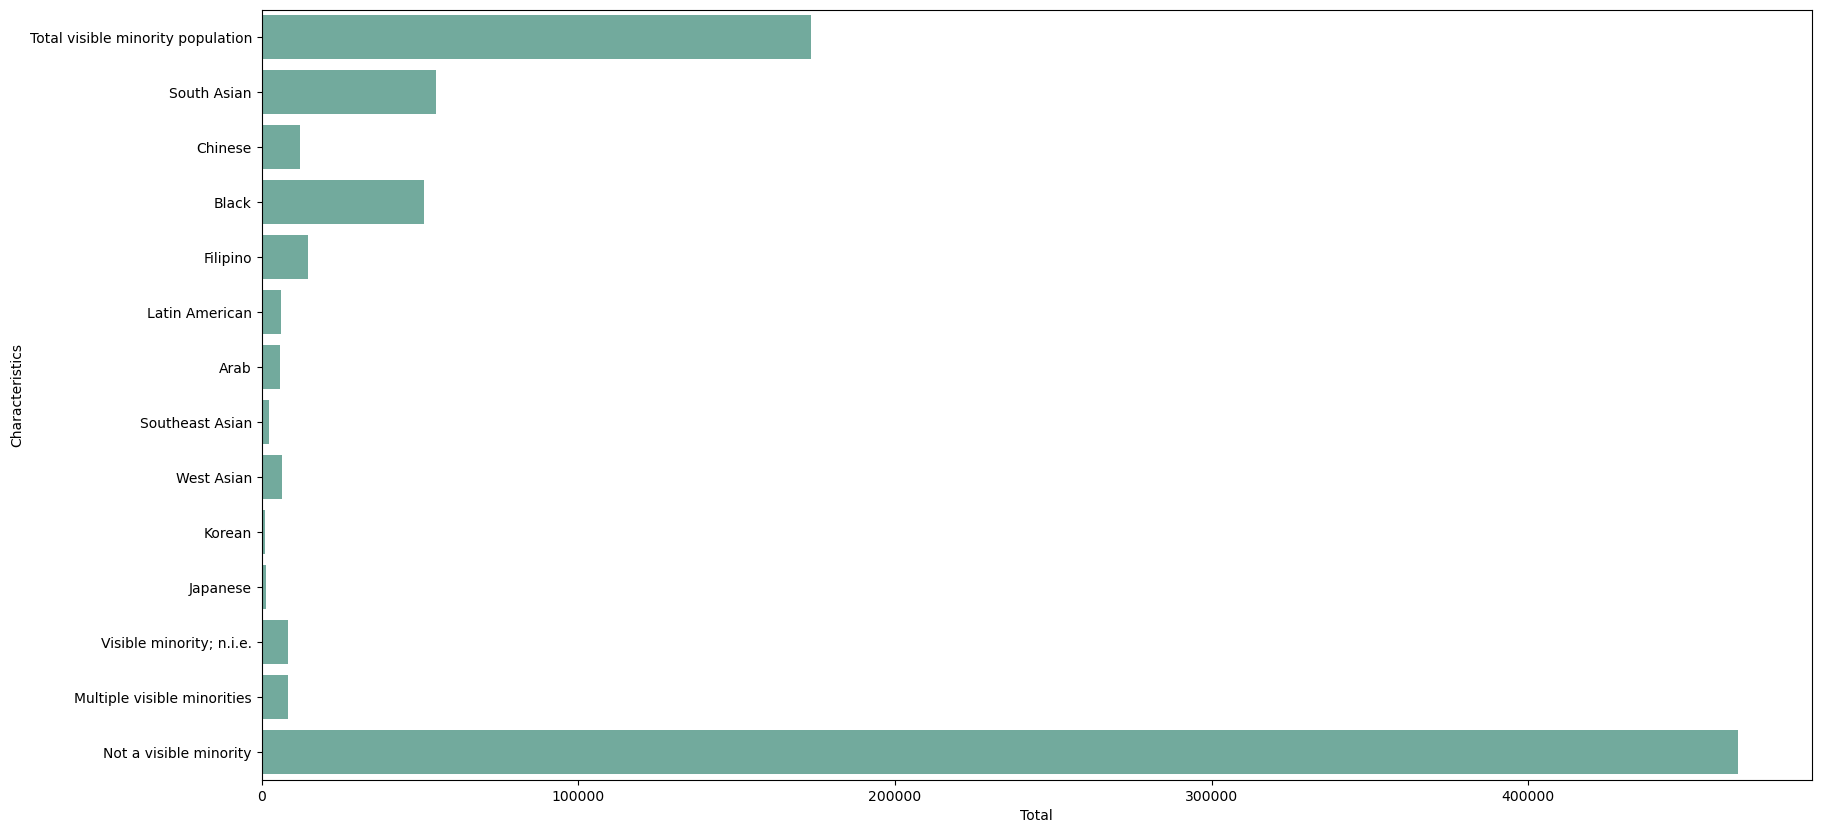

In [5]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Make a bar chart using seaborn
sns.barplot(
    x="Total", 
    y="Characteristics", 
    data=minority.drop(1322), # dropping 1322 gets rid of the unnecessary 'total - visible minority...'
    color='#69b3a2'
);

# Alternative Approaches to Getting Stats Can Census Data

In [8]:
# create dataframes from vectors
# https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=4310002601
from stats_can import StatsCan
sc = StatsCan()

df = sc.vectors_to_df(["v1236788005", "v1236788038", "v1236788049"], periods = 22)
df.columns = ['Total', 'Sponsored', 'Other']
df.index.names = ['Year']
df.head()

/home/gbby/Documents/Research/Infovis/Python/Teaching Notebooks/stats_can.h5 does not exist


43100026-eng.zip:   1%|▏                     | 3.66M/424M [00:07<11:21, 617kB/s]

KeyboardInterrupt: 

43100026-eng.zip:   1%|▏                     | 3.75M/424M [00:19<11:21, 617kB/s]

In [ ]:
# Initiate the statscanpy class
census = scp.Census()

# Get Census profile data with default parameters
result = census.get_cpr_geo()
#print(result)

# Census geographies
geos = census.get_census_geo()
#print(geos)

# Census indicators
ind = census.get_census_indicator()
#print(ind)

# Ontario, 2016
ontario = census.get_cpr_geo(dguid='2016A000235')
toronto = census.get_cpr_geo(dguid='2016A00033520')
durham = census.get_cpr_geo(dguid='2016A00033518')
#print(durham)